In [1]:
# Code examples on AdaBoostR
# University of Passau, Chair of Sensor Technology, ACTLab research group
# Oliver Amft, 2016

%pylab inline
import pylab
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import AdaBoostRegressor as AdaboostR

Populating the interactive namespace from numpy and matplotlib


In [2]:
rng = np.random.RandomState(1)
data = np.loadtxt('apartment_prices.txt', dtype=np.float)
# create target vector
targets = ap_price = data[:,-1]

# create feature matrix: first and second order of apartment size
N = len(targets)
features = np.zeros((N,1))
features[:,0] = data[:,0]     # feature1: size

In [3]:
# train regression
tree = DTR(max_depth=5)
tree.fit(features, targets)
ada = AdaboostR(DTR(max_depth=5), n_estimators=300, random_state=rng)
ada.fit(features, targets)

# prediction (to visualise the trained model)
testdata = np.arange(10.0, 180.0, 0.1)[:, np.newaxis]
predictions1 = tree.predict(testdata)
predictions2 = ada.predict(testdata)
predictions3 = ada.predict(features)

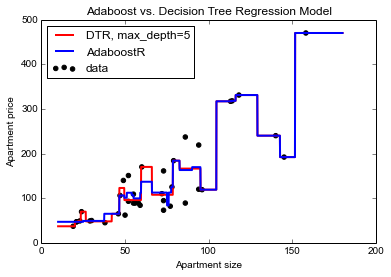

Residual sum of squares: 28435.02
Goodness of fit R²:  0.90


In [4]:
# plot dataset and prediction
plt.figure()
plt.scatter(features, targets, color='black', label="data")
plt.plot(testdata, predictions1, color="red", label="DTR, max_depth=5", linewidth=2)
plt.plot(testdata, predictions2, color="blue", label="AdaboostR", linewidth=2)
plt.title("Adaboost vs. Decision Tree Regression Model")
plt.legend(loc="upper left")
plt.xlabel('Apartment size')
plt.ylabel('Apartment price')
plt.show()

predictions = predictions3
targets = targets

SSres = np.sum((predictions - targets)**2)
print "Residual sum of squares: %5.2f" % SSres
SStot = np.sum((targets - np.mean(targets))**2)
SSreg = np.sum((predictions - np.mean(targets))**2)
print "Goodness of fit R²: %5.2f" % (SSreg/SStot)